# Profitable App Profiles for the App Store and Google Play Markets

## In this project, we're going to determine what type of apps are likely to attract the most users on Google Play and the App Store..

In [57]:
# import relevant libraries
import pandas as pd

# open the Apple Store dataset
opened_file = pd.read_csv('AppleStore.csv')
ios_df = pd.DataFrame(data=opened_file)
ios_header = ios_df.columns
ios_1 = ios_df.iloc[1:]

# open Google Play dataset
opened_file = pd.read_csv('googleplaystore.csv')
google_df = pd.DataFrame(data=opened_file)
google_header = google_df.columns
google_1 = google_df.iloc[1:]

# create copies of the dataset
ios = ios_1.copy()
google = google_1.copy()

In [58]:
ios.info() # what are the features? what are the dtypes? where are the null values? - there are no null values.
print(ios.head())
ios_features = ["size_bytes", "price", "rating_count_tot", "rating_count_ver", "user_rating", "user_rating_ver", "sup_devices.num", "ipadSc_urls.num", "lang.num", "vpp_lic"]
ios.describe() # what is the statisical spread of the numerical data?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7196 entries, 1 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7196 non-null   int64  
 1   track_name        7196 non-null   object 
 2   size_bytes        7196 non-null   int64  
 3   currency          7196 non-null   object 
 4   price             7196 non-null   float64
 5   rating_count_tot  7196 non-null   int64  
 6   rating_count_ver  7196 non-null   int64  
 7   user_rating       7196 non-null   float64
 8   user_rating_ver   7196 non-null   float64
 9   ver               7196 non-null   object 
 10  cont_rating       7196 non-null   object 
 11  prime_genre       7196 non-null   object 
 12  sup_devices.num   7196 non-null   int64  
 13  ipadSc_urls.num   7196 non-null   int64  
 14  lang.num          7196 non-null   int64  
 15  vpp_lic           7196 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory 

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7.196000e+03,7.196000e+03,7196.000000,7.196000e+03,7196.000000,7196.000000,7196.000000,7196.000000,7196.000000,7196.000000,7196.000000
mean,8.632114e+08,1.991079e+08,1.726458,1.248132e+04,460.408421,3.526959,3.253544,37.361868,3.707476,5.431629,0.993052
std,2.711699e+08,3.592248e+08,5.833376,6.721521e+04,3920.726523,1.518053,1.809486,3.737973,1.985886,7.915268,0.083072
min,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,6.002289e+08,4.691226e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,9.781622e+08,9.714637e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,1.082381e+09,1.818150e+08,1.990000,2.791500e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,1.188376e+09,4.025970e+09,299.990000,2.161558e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [59]:
google.info() # what are the features? what are the dtypes? where are the null values? - there are no null values.
print(google)
google_features = ["Category", "Rating", "Reviews", "Size", "Installs", "Type", "Price", "Content Rating", "Genres"] 
google.describe() # what is the statisical spread of the numerical data?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 1 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
                                                     App             Category  \
1                                    Coloring book moana       ART_AND_DESIGN   
2

,Rating
count,9366.000000
mean,4.193348
std,0.537459
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [65]:
# clean google dataset 
# Detect extraneous characters. # note: remove 'M'from Size column, remove "+" from Installs
zero_characters = ["Varies with device", "Free"]
replace_characters = ["M", "k", "+", ","]

def clean(dataset, column):
    dataset[column +"_Clean"] = dataset[column].copy()
    i = 0
    j = 0
    k = len(replace_characters)
    p = len(zero_characters)
    while i < k:         
        dataset[column +"_Clean"] = dataset[column +"_Clean"].str.strip().str.replace(replace_characters[i], "") 
        i += 1
    while j < p:         
        dataset[column +"_Clean"] = dataset[column +"_Clean"].str.strip().str.replace(zero_characters[j], "0") 
        j += 1
    return dataset[column +"_Clean"].astype(float)

clean(google, "Size")
clean(google, "Installs") 

# clean ios dataset # remove "+"from cont_rating

clean(ios, "cont_rating")

# print('Unique Values in pd series:', google["Installs"].value_counts()) # used this line to understand what non-numerical data was in the column.

1       12.0
2        9.0
3        9.0
4       12.0
5       12.0
        ... 
7192     4.0
7193     9.0
7194    12.0
7195    12.0
7196     4.0
Name: cont_rating_Clean, Length: 7196, dtype: float64

In [61]:
# Detect inaccurate data, and correct or remove it. # note: remove row 10472  
google_clean = google.drop(10472, axis=0) 

# no dropping necessary for ios dataset

In [73]:
# Remove apps that aren't free.
google_bool = google_clean["Type"] == "Free"
google_clean2 = google_clean.drop(google_clean.index[(google_bool)],  axis=0)
print(google_clean2["Type"].value_counts())

ios_bool = ios["price"] == 0
ios_clean2 = ios.drop(ios.index[(ios_bool)],  axis=0)
print(ios_clean2["price"].value_counts())


Paid    800
Name: Type, dtype: int64
0.99      728
2.99      683
1.99      621
4.99      394
3.99      277
6.99      166
9.99       81
5.99       52
7.99       33
14.99      21
19.99      13
8.99        9
24.99       8
13.99       6
29.99       6
11.99       6
12.99       5
15.99       4
17.99       3
59.99       3
39.99       2
22.99       2
16.99       2
20.99       2
49.99       2
27.99       2
23.99       2
74.99       1
99.99       1
299.99      1
18.99       1
21.99       1
34.99       1
249.99      1
47.99       1
Name: price, dtype: int64


In [75]:
# Detect duplicate data, and remove the duplicates. # note: check each feature for duplicates
google_clean3 = google_clean2.drop_duplicates()
print(google_clean3.head())

print('\n')
print('\n')
print('\n')

ios_clean3 = ios_clean2.drop_duplicates()
print(ios_clean3.head())

                                               App       Category  Rating  \
234  TurboScan: scan documents and receipts in PDF       BUSINESS     4.7   
235                 Tiny Scanner Pro: PDF Doc Scan       BUSINESS     4.8   
427                             Puffin Browser Pro  COMMUNICATION     4.0   
476                      Moco+ - Chat, Meet People         DATING     4.2   
477                                     Calculator         DATING     2.6   

    Reviews                Size  Installs  Type  Price Content Rating  \
234   11442                6.8M  100,000+  Paid  $4.99       Everyone   
235   10295                 39M  100,000+  Paid  $4.99       Everyone   
427   18247  Varies with device  100,000+  Paid  $3.99       Everyone   
476    1545  Varies with device   10,000+  Paid  $3.99     Mature 17+   
477      57                6.2M    1,000+  Paid  $6.99       Everyone   

            Genres      Last Updated  Current Ver Android Ver Size_Clean  \
234       Business    

In [76]:
# Remove non-English apps like 爱奇艺PPS -《欢乐颂2》电视剧热播.
def is_english(string):
    non_ascii = 0
    
    for character in string:
        if ord(character) > 127:
            non_ascii += 1
    
    if non_ascii > 3:
        return False
    else:
        return True
     
google_cleanbool = google_clean3["App"].apply(is_english)
google_clean4 = google_clean3[google_cleanbool]
print(google_clean4["App"].value_counts()) # 753 english titles ; 4 non-english titles = 757


ios_cleanbool = ios_clean3["track_name"].apply(is_english)
ios_clean4 = ios_clean3[ios_cleanbool]
print(ios_clean4["track_name"].value_counts()) 

The Game of Life                                    2
Human Anatomy Atlas 2018: Complete 3D Human Body    2
Minecraft                                           2
HD Widgets                                          2
Toca Life: City                                     2
                                                   ..
Pocket Yoga                                         1
CZ-38 (vz 38) pistol explained                      1
Language Therapy: Aphasia                           1
Campervan.Guide Pro                                 1
Basket Manager 2017 Pro                             1
Name: App, Length: 753, dtype: int64
This by Tinrocket                                                           1
CHAOS RINGS Ⅲ                                                               1
WitchSpring2                                                                1
Robbiemoji by Robbie Williams                                               1
Batman - The Telltale Series                             

## Let's begin the analysis by getting a sense of the most common genres for each market. For this, we'll build a frequency table # for the prime_genre column of the App Store data set, and the Genres and Category columns of the Google Play data set. 

In [79]:
print("App Store top genres:", '\n', ios_clean4["prime_genre"].value_counts().head()) 
print('\n')
print('\n')
print("Google Store top genres:", '\n', google_clean4["Genres"].value_counts().head()) 
print('\n')
print('\n')
print("Google store top categories:", '\n', google_clean4["Category"].value_counts().head())

App Store top genres: 
 Games            1518
Education         292
Entertainment     195
Photo & Video     181
Utilities         132
Name: prime_genre, dtype: int64




Google Store top genres: 
 Medical              84
Personalization      82
Tools                78
Education            29
Books & Reference    28
Name: Genres, dtype: int64




Googel store top categories: 
 FAMILY             186
MEDICAL             84
GAME                83
PERSONALIZATION     82
TOOLS               78
Name: Category, dtype: int64


# Most Popular Apps by Genre on the App Store

## One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the Google Play data set, we can find this information in the Installs column, but for the App Store data set this information is missing. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the rating_count_tot app. 

Google installs per genre:


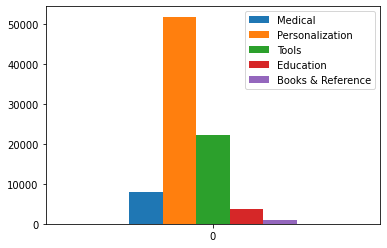

In [135]:
ios_topgenre = ["Games", "Education", "Entertainment", "Photo & Video", "Utilities"]
google_topgenre = ["Medical", "Personalization", "Tools","Education", "Books & Reference"]
google_topcategories = ["FAMILY", "MEDICAL", "GAME", "PERSONALIZATION", "TOOLS"]

ios_installs = {}
google_installs_genre = {}
google_installs_category = {}

def install_count(topgenre_list, dictionary, dataset, column_name, installs_name):
    for i in topgenre_list:
        install_bool = dataset[column_name] == i
        dk = dataset[install_bool]
        install_avg = dk[installs_name].astype(float).mean()
        dictionary[str(i)] = install_avg 
    return dictionary


d_google = install_count(google_topgenre, google_installs_genre, google_clean4, "Genres", "Installs_Clean")
df = pd.DataFrame([d_google], columns=d_google.keys())

# print(df)
print('Google installs per genre:')
df.plot.bar(rot=0)

Google installs per category:


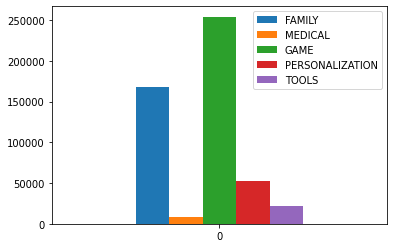

In [136]:
d_google_c = install_count(google_topcategories, google_installs_category, google_clean4, "Category", "Installs_Clean")
df_gc = pd.DataFrame([d_google_c], columns=d_google_c.keys())

# print(df_gc)
print('Google installs per category:')
df_gc.plot.bar(rot=0)

Ios rating count total per genre:


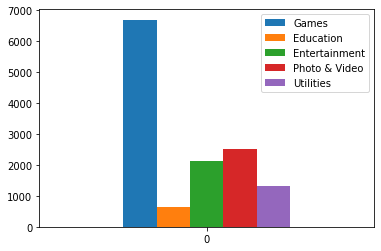

In [138]:
d_ios = install_count(ios_topgenre, ios_installs, ios_clean4, "prime_genre", "rating_count_tot")
df_ios = pd.DataFrame([d_ios], columns=d_ios.keys())

# print(df_ios)
print('Ios rating count total per genre:')
df_ios.plot.bar(rot=0)

# Observations / Conclusion

## Not suprisingly, apps that are categorized under "Games" do the best in Google and App stores. I'm not sure what genre "Personalization" fits under, but it could be a genre worth exploring under the App Store.

# Next Time 

## If I were to do this again, I would clean the Installs column for the Apps column and try to do an Installs Count comparison between the google and ios datasets.